In [ ]:
!pip install tensorflow numpy pandas matplotlib scikit-learn


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Load dataset
file_path = "/content/100.csv"  # Change this to your actual dataset path
df = pd.read_csv(file_path)

# Drop the unlabelled index column if not needed
df = df.iloc[:, 1:]  # Assuming the first column is the unlabelled one

# Selecting relevant features
X = df[['MLII', 'V5']].values  # ECG signal inputs

# Normalize using Min-Max Scaling
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Generate labels (Example: Create a binary label randomly for now)
# In reality, replace this with actual labels
y = np.random.randint(0, 2, len(X))  # Dummy binary labels (0 or 1)

# Train-Test-Validation Split (70-20-10)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.33, random_state=42)

# Reshape data for CNN (assuming 1D signals, add channel dimension)
X_train = X_train.reshape(-1, 2, 1)
X_val = X_val.reshape(-1, 2, 1)
X_test = X_test.reshape(-1, 2, 1)

# Print shapes to verify
print(f"Train shape: {X_train.shape}, Validation shape: {X_val.shape}, Test shape: {X_test.shape}")


Train shape: (455000, 2, 1), Validation shape: (130650, 2, 1), Test shape: (64350, 2, 1)


In [18]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2

# Build CNN Model
model = Sequential([
    # 1st Convolutional Layer
    Conv1D(filters=32, kernel_size=1, activation='relu', input_shape=(2, 1)),  # 2 features, 1 channel
    BatchNormalization(),
    MaxPooling1D(pool_size=2),

    # 2nd Convolutional Layer
    Conv1D(filters=64, kernel_size=1, activation='relu'),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),

    # 3rd Convolutional Layer
    Conv1D(filters=128, kernel_size=1, activation='relu'),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),

    Flatten(),

    # Fully Connected Layer with L2 Regularization
    Dense(128, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.4),  # Dropout to prevent overfitting

    Dense(64, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.3),

    # Output Layer (Binary Classification)
    Dense(1, activation='sigmoid')
])

# Compile the Model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Summary of the Model
model.summary()


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_19 (Conv1D)                   │ (None, 2, 32)               │              64 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 2, 32)               │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_19 (MaxPooling1D)      │ (None, 1, 32)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_20 (Conv1D)                   │ (None, 1, 64)               │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 1, 64)               │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_20 (MaxPooling1D)      │ (None, 0, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_21 (Conv1D)                   │ (None, 0, 128)              │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_11               │ (None, 0, 128)              │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_21 (MaxPooling1D)      │ (None, 0, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_8 (Flatten)                  │ (None, 0)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 128)                 │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,841 (77.50 KB)

 Trainable params: 19,393 (75.75 KB)

 Non-trainable params: 448 (1.75 KB)

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, BatchNormalization, Flatten, Dense, Dropout

model = Sequential([
    # 1st Convolutional Layer
    Conv1D(filters=32, kernel_size=2, activation='relu', input_shape=(20, 1)),  # Increase input size
    BatchNormalization(),
    MaxPooling1D(pool_size=2),

    # 2nd Convolutional Layer
    Conv1D(filters=64, kernel_size=2, activation='relu'),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),

    # 3rd Convolutional Layer
    Conv1D(filters=128, kernel_size=2, activation='relu'),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),

    # Flatten the output
    Flatten(),

    # Fully Connected Layers
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Sigmoid output for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Summary of the model
model.summary()


Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_31 (Conv1D)                   │ (None, 19, 32)              │              96 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_21               │ (None, 19, 32)              │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_31 (MaxPooling1D)      │ (None, 9, 32)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_32 (Conv1D)                   │ (None, 8, 64)               │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_22               │ (None, 8, 64)               │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_32 (MaxPooling1D)      │ (None, 4, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_33 (Conv1D)                   │ (None, 3, 128)              │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_23               │ (None, 3, 128)              │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_33 (MaxPooling1D)      │ (None, 1, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_12 (Flatten)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_31 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_22 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_32 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_23 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_33 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 46,497 (181.63 KB)

 Trainable params: 46,049 (179.88 KB)

 Non-trainable params: 448 (1.75 KB)

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, BatchNormalization, Flatten, Dense, Dropout

model = Sequential([
    # 1st Convolutional Layer
    Conv1D(filters=32, kernel_size=2, activation='relu', input_shape=(20, 1)),  # Input shape (increase if needed)
    BatchNormalization(),

    # 2nd Convolutional Layer (pooling added here instead of the first layer)
    Conv1D(filters=64, kernel_size=2, activation='relu'),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),  # Reduce pool size if needed

    # 3rd Convolutional Layer
    Conv1D(filters=128, kernel_size=2, activation='relu'),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),  # Apply pooling here as well

    # Flatten the output
    Flatten(),

    # Fully Connected Layers
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Sigmoid output for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Summary of the model
model.summary()


Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_34 (Conv1D)                   │ (None, 19, 32)              │              96 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_24               │ (None, 19, 32)              │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_35 (Conv1D)                   │ (None, 18, 64)              │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_25               │ (None, 18, 64)              │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_34 (MaxPooling1D)      │ (None, 9, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_36 (Conv1D)                   │ (None, 8, 128)              │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_26               │ (None, 8, 128)              │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_35 (MaxPooling1D)      │ (None, 4, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_13 (Flatten)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_34 (Dense)                     │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_24 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_35 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_25 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_36 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 95,649 (373.63 KB)

 Trainable params: 95,201 (371.88 KB)

 Non-trainable params: 448 (1.75 KB)

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, BatchNormalization, Flatten, Dense, Dropout

model = Sequential([
    # 1st Convolutional Layer
    Conv1D(filters=32, kernel_size=2, activation='relu', input_shape=(2, 1), padding='same'),
    BatchNormalization(),
    MaxPooling1D(pool_size=2, padding='same'),

    # 2nd Convolutional Layer
    Conv1D(filters=64, kernel_size=2, activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling1D(pool_size=2, padding='same'),

    # 3rd Convolutional Layer
    Conv1D(filters=128, kernel_size=2, activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling1D(pool_size=2, padding='same'),

    # Flatten the output
    Flatten(),

    # Fully Connected Layers
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Sigmoid output for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Summary of the model
model.summary()


Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_37 (Conv1D)                   │ (None, 2, 32)               │              96 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_27               │ (None, 2, 32)               │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_36 (MaxPooling1D)      │ (None, 1, 32)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_38 (Conv1D)                   │ (None, 1, 64)               │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_28               │ (None, 1, 64)               │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_37 (MaxPooling1D)      │ (None, 1, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_39 (Conv1D)                   │ (None, 1, 128)              │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_29               │ (None, 1, 128)              │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_38 (MaxPooling1D)      │ (None, 1, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_14 (Flatten)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_37 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_26 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_38 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_27 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_39 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 46,497 (181.63 KB)

 Trainable params: 46,049 (179.88 KB)

 Non-trainable params: 448 (1.75 KB)

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_40 (Conv1D)                   │ (None, 2, 32)               │              96 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_30               │ (None, 2, 32)               │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_39 (MaxPooling1D)      │ (None, 1, 32)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_41 (Conv1D)                   │ (None, 1, 64)               │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_31               │ (None, 1, 64)               │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_40 (MaxPooling1D)      │ (None, 1, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_42 (Conv1D)                   │ (None, 1, 128)              │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_32               │ (None, 1, 128)              │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_41 (MaxPooling1D)      │ (None, 1, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_15 (Flatten)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_40 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_28 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_41 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_29 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_42 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 46,497 (181.63 KB)

 Trainable params: 46,049 (179.88 KB)

 Non-trainable params: 448 (1.75 KB)

Epoch 1/15
14219/14219 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4991 - loss: 0.7029

14219/14219 ━━━━━━━━━━━━━━━━━━━━ 44s 3ms/step - accuracy: 0.4991 - loss: 0.7029 - val_accuracy: 0.5024 - val_loss: 0.6931
Epoch 2/15
14217/14219 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4995 - loss: 0.6934

14219/14219 ━━━━━━━━━━━━━━━━━━━━ 42s 3ms/step - accuracy: 0.4995 - loss: 0.6934 - val_accuracy: 0.5024 - val_loss: 0.6931
Epoch 3/15
14219/14219 ━━━━━━━━━━━━━━━━━━━━ 82s 3ms/step - accuracy: 0.4993 - loss: 0.6932 - val_accuracy: 0.5024 - val_loss: 0.6931
Epoch 4/15
14203/14219 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5005 - loss: 0.6932

14219/14219 ━━━━━━━━━━━━━━━━━━━━ 42s 3ms/step - accuracy: 0.5005 - loss: 0.6932 - val_accuracy: 0.5024 - val_loss: 0.6931
Epoch 5/15
14219/14219 ━━━━━━━━━━━━━━━━━━━━ 84s 3ms/step - accuracy: 0.5022 - loss: 0.6932 - val_accuracy: 0.5024 - val_loss: 0.6931
Epoch 6/15
14219/14219 ━━━━━━━━━━━━━━━━━━━━ 81s 3ms/step - accuracy: 0.5001 - loss: 0.6932 - val_accuracy: 0.5024 - val_loss: 0.6932
Epoch 7/15
14219/14219 ━━━━━━━━━━━━━━━━━━━━ 42s 3ms/step - accuracy: 0.4988 - loss: 0.6932 - val_accuracy: 0.5024 - val_loss: 0.6931


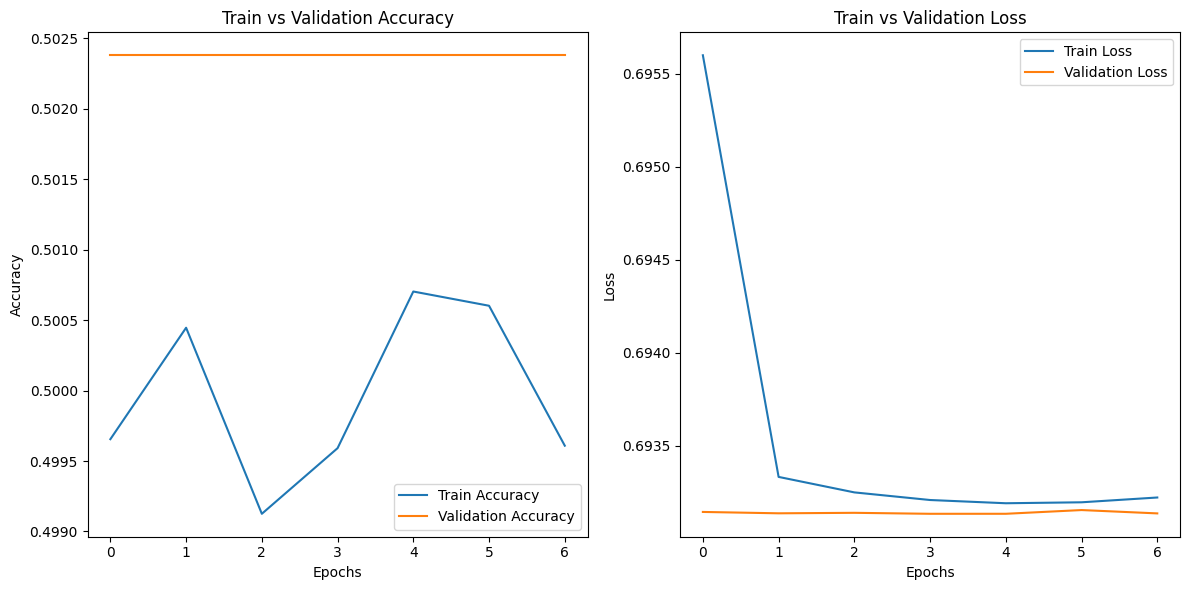

2011/2011 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.4979 - loss: 0.6932
Test accuracy: 0.49773114919662476
Test loss: 0.6932072639465332


In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, BatchNormalization, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt

# Define the model
model = Sequential([
    # 1st Convolutional Layer
    Conv1D(filters=32, kernel_size=2, activation='relu', input_shape=(2, 1), padding='same'),
    BatchNormalization(),
    MaxPooling1D(pool_size=2, padding='same'),

    # 2nd Convolutional Layer
    Conv1D(filters=64, kernel_size=2, activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling1D(pool_size=2, padding='same'),

    # 3rd Convolutional Layer
    Conv1D(filters=128, kernel_size=2, activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling1D(pool_size=2, padding='same'),

    # Flatten the output
    Flatten(),

    # Fully Connected Layers
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Sigmoid output for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Summary of the model
model.summary()

# Callbacks for EarlyStopping and ModelCheckpoint
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_loss')

# Train the model
history = model.fit(
    X_train, y_train,  # Training data and labels
    validation_data=(X_val, y_val),  # Validation data and labels
    epochs=15,
    batch_size=32,
    callbacks=[early_stopping, model_checkpoint]
)

# Plot the training and validation accuracy
plt.figure(figsize=(12, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Train vs Validation Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Train vs Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)  # Testing data and labels
print(f'Test accuracy: {test_acc}')
print(f'Test loss: {test_loss}')


In [29]:
model = Sequential([
    # 1st Convolutional Layer
    Conv1D(filters=16, kernel_size=2, activation='relu', input_shape=(2, 1), padding='same'),
    BatchNormalization(),
    MaxPooling1D(pool_size=2, padding='same'),

    # 2nd Convolutional Layer
    Conv1D(filters=32, kernel_size=2, activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling1D(pool_size=2, padding='same'),

    # Flatten the output
    Flatten(),

    # Fully Connected Layers
    Dense(64, activation='relu'),
    Dropout(0.3),  # Lowered dropout
    Dense(32, activation='relu'),
    Dropout(0.3),  # Lowered dropout
    Dense(1, activation='sigmoid')  # Sigmoid output for binary classification
])


In [30]:
from tensorflow.keras.optimizers import Adam

# Adjust learning rate if needed
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])


In [31]:
class_weight = {0: 1, 1: 10}  # Adjust based on dataset imbalance
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=15, batch_size=32, class_weight=class_weight)


Epoch 1/15
14219/14219 ━━━━━━━━━━━━━━━━━━━━ 34s 2ms/step - accuracy: 0.4993 - loss: 1.8840 - val_accuracy: 0.4976 - val_loss: 1.2716
Epoch 2/15
14219/14219 ━━━━━━━━━━━━━━━━━━━━ 32s 2ms/step - accuracy: 0.5005 - loss: 1.7033 - val_accuracy: 0.4976 - val_loss: 1.2742
Epoch 3/15
14219/14219 ━━━━━━━━━━━━━━━━━━━━ 33s 2ms/step - accuracy: 0.4986 - loss: 1.6972 - val_accuracy: 0.4976 - val_loss: 1.2856
Epoch 4/15
14219/14219 ━━━━━━━━━━━━━━━━━━━━ 41s 2ms/step - accuracy: 0.4986 - loss: 1.6917 - val_accuracy: 0.4976 - val_loss: 1.2621
Epoch 5/15
14219/14219 ━━━━━━━━━━━━━━━━━━━━ 41s 2ms/step - accuracy: 0.4992 - loss: 1.6867 - val_accuracy: 0.4976 - val_loss: 1.2344
Epoch 6/15
14219/14219 ━━━━━━━━━━━━━━━━━━━━ 42s 2ms/step - accuracy: 0.4987 - loss: 1.6855 - val_accuracy: 0.4976 - val_loss: 1.2581
Epoch 7/15
14219/14219 ━━━━━━━━━━━━━━━━━━━━ 40s 2ms/step - accuracy: 0.4986 - loss: 1.6853 - val_accuracy: 0.4976 - val_loss: 1.2442
Epoch 8/15
14219/14219 ━━━━━━━━━━━━━━━━━━━━ 41s 2ms/step - accuracy: 

In [40]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, BatchNormalization, GlobalAveragePooling1D, Dense, Dropout

# Assuming your input data has shape (num_samples, 2, 1)
# Example: reshaping your data (X_train and X_val)
X_train = X_train.reshape((X_train.shape[0], 2, 1))  # Reshape to (num_samples, 2, 1)
X_val = X_val.reshape((X_val.shape[0], 2, 1))        # Reshape for validation data

# Define the model with padding='same' to keep sequence length
model = Sequential([
    Conv1D(filters=64, kernel_size=2, activation='relu', padding='same', input_shape=(2, 1)),
    BatchNormalization(),

    Conv1D(filters=128, kernel_size=2, activation='relu', padding='same'),
    BatchNormalization(),

    Conv1D(filters=256, kernel_size=2, activation='relu', padding='same'),
    BatchNormalization(),

    GlobalAveragePooling1D(),  # Reduces the sequence dimension
    Dense(128, activation='relu'),
    Dropout(0.3),

    Dense(64, activation='relu'),
    Dropout(0.3),

    Dense(1, activation='sigmoid')  # For binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

# Train the model
history = model.fit(X_train, y_train, epochs=15, batch_size=32, validation_data=(X_val, y_val))

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy}")
print(f"Test Loss: {test_loss}")


Model: "sequential_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_63 (Conv1D)                   │ (None, 2, 64)               │             192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_53               │ (None, 2, 64)               │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_64 (Conv1D)                   │ (None, 2, 128)              │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_54               │ (None, 2, 128)              │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_65 (Conv1D)                   │ (None, 2, 256)              │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_55               │ (None, 2, 256)              │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d_4           │ (None, 256)                 │               0 │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_58 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_40 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_59 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_41 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_60 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 125,505 (490.25 KB)

 Trainable params: 124,609 (486.75 KB)

 Non-trainable params: 896 (3.50 KB)

Epoch 1/15
14219/14219 ━━━━━━━━━━━━━━━━━━━━ 68s 5ms/step - accuracy: 0.5004 - loss: 0.6947 - val_accuracy: 0.5024 - val_loss: 0.6932
Epoch 2/15
14219/14219 ━━━━━━━━━━━━━━━━━━━━ 86s 5ms/step - accuracy: 0.4997 - loss: 0.6932 - val_accuracy: 0.5024 - val_loss: 0.6931
Epoch 3/15
14219/14219 ━━━━━━━━━━━━━━━━━━━━ 78s 5ms/step - accuracy: 0.4985 - loss: 0.6932 - val_accuracy: 0.4976 - val_loss: 0.6932
Epoch 4/15
14219/14219 ━━━━━━━━━━━━━━━━━━━━ 67s 5ms/step - accuracy: 0.5008 - loss: 0.6932 - val_accuracy: 0.4976 - val_loss: 0.6932
Epoch 5/15
14219/14219 ━━━━━━━━━━━━━━━━━━━━ 83s 5ms/step - accuracy: 0.4999 - loss: 0.6932 - val_accuracy: 0.4976 - val_loss: 0.6932
Epoch 6/15
14219/14219 ━━━━━━━━━━━━━━━━━━━━ 81s 5ms/step - accuracy: 0.5011 - loss: 0.6932 - val_accuracy: 0.5024 - val_loss: 0.6931
Epoch 7/15
14219/14219 ━━━━━━━━━━━━━━━━━━━━ 65s 5ms/step - accuracy: 0.5008 - loss: 0.6932 - val_accuracy: 0.4976 - val_loss: 0.6931
Epoch 8/15
14219/14219 ━━━━━━━━━━━━━━━━━━━━ 69s 5ms/step - accuracy: 

In [42]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')


2011/2011 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4979 - loss: 0.6932
Test Loss: 0.6932008862495422
Test Accuracy: 0.49774670600891113


In [44]:
predictions = model.predict(X_test)
predictions = (predictions > 0.5)  # Converts probabilities to 0 or 1


2011/2011 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step


In [45]:
model.save('your_model.h5')  # Save the model as HDF5 file


In [46]:
from tensorflow.keras.models import load_model
model = load_model('your_model.h5')


In [47]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)  # Convert probabilities to class labels
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


2011/2011 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
[[32029     0]
 [32320     1]]
              precision    recall  f1-score   support

           0       0.50      1.00      0.66     32029
           1       1.00      0.00      0.00     32321

    accuracy                           0.50     64350
   macro avg       0.75      0.50      0.33     64350
weighted avg       0.75      0.50      0.33     64350

